In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

Information for Mutant strain 1 considering only assembly and disassembly rates
[[0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 1.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] [1.08702465e+00 1.78240194e+00 2.75666649e+00 ... 1.01540491e+07
 1.01540494e+07 1.01540503e+07]
6094677 0 0 0 0 1557747 0 2347576 6094677
probablity for 8 microstates are : p0 = 0.6094677 p1 = 0.0 p2 = 0.0 p3 = 0.0 p4 = 0.0 p5 = 0.1557747 p6 = 0.0 p7 = 0.2347576
total probability = 1.0


1.3440719495474607

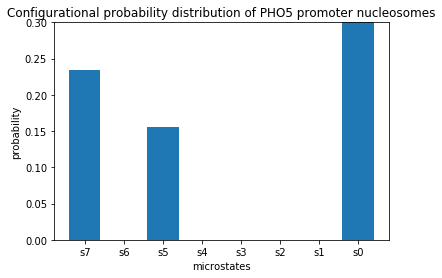

In [6]:
#considering the rates of assembly and disassembly only:
print('Information for Mutant strain 1 considering only assembly and disassembly rates')
def nuc(n,kd,ks):
    #i = int(input("Enter the number of nucleosomes = "))
    i = 3
    x_array = np.zeros((n,i))
    t_array = np.zeros(n)
    t = 0
    mi = 1
    l = []
    for y in range(n):
        r1 = random.uniform(0,1)
        r3 = random.uniform(0,1)
        r4 = random.uniform(0,1)
        for z in range(i):
            if z ==0 or z ==2:
                ka = 1
                a = 1/(ka+kd)
                pa = ka*a
                pd = kd*a
                if r1<pa or r1 == pa:
                    mz = 1
                else:
                    mz = 0
                    
                x_array[y,z] = mz
            
            if z == 1:
                ka = 1
                a = 1/(ka+kd+ks)
                pa = ka*a
                pd = kd*a
                ps = ks*a
                if r1<pa or r1 == pa:
                    mz = 1
                    if r3>(pa+pd) and (r3<(pa+pd+ps) or r3==(pa+pd+ps)):
                        if x_array[y,z-1] == 0 and x_array[y,z+1] == 0:
                            if r3<0.5:
                                mz = 0
                                ma = 1
                                mb = 0
                            else:
                                mz = 0
                                ma = 0
                                mb = 1
                            
                        if (x_array[y,z] == 1 and x_array[y,z+1] == 1):
                            mz = 0
                            ma = 1
                            mb = 1
                        else:
                            mz = 1
                            mb = 1
                            ma = 0
                            
                        if (x_array[y,z] == 1 and x_array[y,z-1] == 1):
                            mz = 0
                            ma = 1
                            mb = 1
                        else:
                            ma = 1
                            mz = 1
                            mb = 0
                            
                        x_array[y,z-1] = ma
                        x_array[y,z+1] = mb
                    x_array[y,z] = mz
                elif r1>pa and (r1<(pa+pd) or r1== (pa+pd)):
                    mz = 0
                
                x_array[y,z] = mz
                
            r2 = random.uniform(0,1)
            dt = (-1)*a*math.log(r2)
            t = t + dt
        t_array[y] = t
    
    print(x_array,t_array)
    x1 = x_array[:,0].tolist()
    x2 = x_array[:,1].tolist()
    x3 = x_array[:,2].tolist()
    #print(x1,x2,x3)
    s1 = 0;s2 = 0; s3 = 0; s4 = 0; s5 = 0; s6 = 0; s7 = 0; s0 = 0
    for i in range(n):
        if x1[i]==1 and x2[i]==0 and x3[i]==0:
            s1 +=1
        else:
            s1 +=0
            
        if x2[i] == 1 and x1[i]==0 and x3[i]==0:
            s2 +=1
        else:
            s2 +=0
            
        if x3[i]==1 and x1[i]==0 and x2[i]==0:
            s3 +=1
        else:
            s3 +=0
        
        if x1[i]==0 and x2[i]==0 and x3[i]==0:
            s0 += 1
        else:
            s0 += 0
        
        if x1[i]==1 and x2[i]==1 and x3[i]==0:
            s4 += 1
        else:
            s4 += 0
        
        if x1[i]==0 and x2[i]==1 and x3[i]==1:
            s6 += 1
        else:
            s6 += 0
        
        if x1[i]==1 and x2[i]==0 and x3[i]==1:
            s5 += 1
        else:
            s5 += 0
            
        if x1[i]==1 and x2[i]==1 and x3[i]==1:
            s7 += 1
        else:
            s7 += 0
    
    print(s0,s1,s2,s3,s4,s5,s6,s7,s0)
    p0 = s0/n; p1= s1/n; p2 = s2/n; p3 = s3/n; p4 = s4/n; p5 = s5/n; p6 = s5/n; p6 = s6/n; p7 = s7/n
    total = p0+p1+p2+p3+p4+p5+p6+p7
    print('probablity for 8 microstates are : p0 =',p0,'p1 =',p1,'p2 =',p2,'p3 =',p3,'p4 =',p4,'p5 =',p5,'p6 =',p6,'p7 =',p7)
    print("total probability =",total)
    p = [p7,p6,p5,p4,p3,p2,p1,p0]
    s = ['s7','s6','s5','s4','s3','s2','s1','s0']
    plt.bar(s,p)
    plt.xlabel('microstates')
    plt.ylabel('probability')
    plt.ylim(0,0.3)
    plt.title('Configurational probability distribution of PHO5 promoter nucleosomes')
    
    in0 = 0; in1 = 0; in2 = 0; in3 = 0; in4 = 0; in5 = 0; in6 = 0; in7 = 0
        
    if p0 == 0:
        in0 = 0
    else:
        in0 = (p0*math.log2(p0))
    
    if p1 == 0:
        in1 = 0
    else:
        in1 = (p1*math.log2(p1))
    
    if p2 ==0:
        in2 = 0
    else:
        in3 = (p2*math.log2(p2))
    
    if p3 ==0:
        in3 = 0
    else:
        in3 = (p3*math.log2(p3))
        
    if p4==0:
        in4 = 0
    else:
        in4 = (p4*math.log2(p4))
        
    if p5==0:
        in5 =0
    else:
        in5 = (p5*math.log2(p5))
        
    if p6==0:
        in6 =0
    else:
        in6 = (p6*math.log2(p6))
        
    if p7 ==0:
        in7 = 0
    else:
        in7 = (p7*math.log2(p7))
        
    inf = -(in0+in1+in2+in3+in4+in5+in6+in7)
    return inf
    
nuc(10000000, 1.56, 1.7)